# Pymaceuticals Inc.
---

### Analysis

- The total number of mice is 249 with nearly equal Male to Female ratio. Ten drug regimen groups were tested, the largest groups are Capomulin and Ramicane (more than 200 measurements). 
Our particular focus was on Capomulin, Racemine, Infubino, and Ceftamin drug regimen groups. The statistic data showed relatively clean data (no outliers, except one outlier in Infibunol drug regimen). Two drug regimens, Capomulin and Racemine, showed lower max tumor volume (mm3). As example, Capomulin drug regimen showed a decrease in the tumor volume over time. Moreover, we confirmed that the average tumor volume linearly correlates with the mouse weight, which is statistically significant (r value = 0.84).
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single DataFrame
sum_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how= "outer")

# Display the data table for preview
sum_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_mice = []
for mouse in sum_df["Mouse ID"]:
     if mouse not in total_mice:
        total_mice.append(mouse)
total_mice = len(total_mice)
print(f"The total number of mice is {total_mice}")

The total number of mice is 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = sum_df.loc[sum_df.duplicated(subset=["Mouse ID", "Timepoint"], keep = False)]
duplicate_mice_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
example_mouse = sum_df.loc[sum_df["Mouse ID"] == "g989",:]
example_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = sum_df.drop_duplicates(subset=("Mouse ID", "Timepoint"), keep="last")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
total = []
for mouse in clean_df["Mouse ID"]:
     if mouse not in total:
        total.append(mouse)
total = len(total)
print(f"The total number of mice is {total}")

The total number of mice is 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_gp = clean_df.groupby(["Drug Regimen"])
mean = regimen_gp["Tumor Volume (mm3)"].mean()
median = regimen_gp["Tumor Volume (mm3)"].median()
var = regimen_gp["Tumor Volume (mm3)"].var()
std = regimen_gp["Tumor Volume (mm3)"].std()
sem = regimen_gp["Tumor Volume (mm3)"].sem()

summary_regimen_df = pd.DataFrame({"Average": round(mean,1),
                                  "Median": round(median,1),
                                   "Variance": round(var,1),
                                  "Standard deviation": round(std,1),
                                  "SEM": round(sem,1)})
summary_regimen_df
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Average,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.7,41.6,24.9,5.0,0.3
Ceftamin,52.6,51.8,39.3,6.3,0.5
Infubinol,52.9,51.8,43.1,6.6,0.5
Ketapril,55.2,53.7,68.6,8.3,0.6
Naftisol,54.3,52.5,66.2,8.1,0.6
Placebo,54.0,52.3,61.2,7.8,0.6
Propriva,52.4,50.8,43.2,6.6,0.5
Ramicane,40.2,40.7,23.5,4.8,0.3
Stelasyn,54.2,52.4,59.5,7.7,0.6


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].aggregate(["mean", "median","var","std","sem"])
summary_agg.round(1)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.7,41.6,24.9,5.0,0.3
Ceftamin,52.6,51.8,39.3,6.3,0.5
Infubinol,52.9,51.8,43.1,6.6,0.5
Ketapril,55.2,53.7,68.6,8.3,0.6
Naftisol,54.3,52.5,66.2,8.1,0.6
Placebo,54.0,52.3,61.2,7.8,0.6
Propriva,52.4,50.8,43.2,6.6,0.5
Ramicane,40.2,40.7,23.5,4.8,0.3
Stelasyn,54.2,52.4,59.5,7.7,0.6


## Bar and Pie Charts

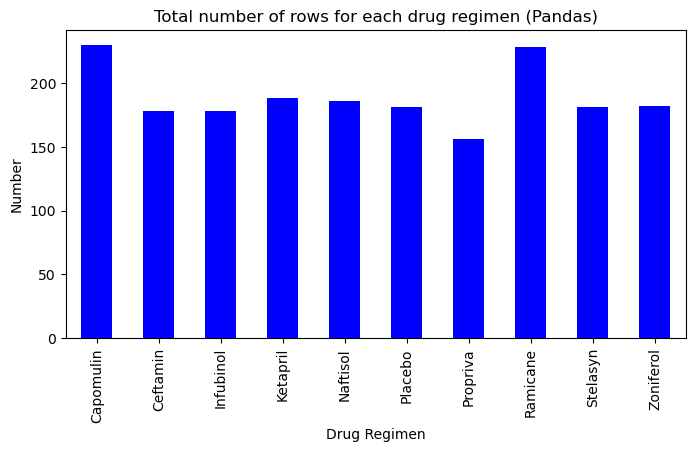

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
number_rows = regimen_gp["Mouse ID" and "Timepoint"].count()
figure_pandas = number_rows.plot(kind="bar", figsize=(8,4), color=["blue"], title="Total number of rows for each drug regimen (Pandas)",
                                   xlabel="Drug Regimen", ylabel="Number")
plt.show()

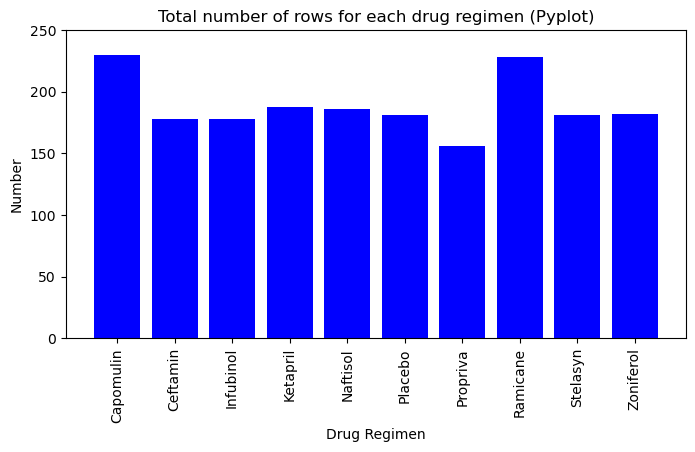

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
number_rows2 = regimen_gp["Mouse ID" and "Timepoint"].count()
x_axis = np.arange(0, len(regimen_gp), 1)
plt.figure(figsize=(8,4))
plt.bar(x_axis, number_rows2, color='b')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, number_rows2.index, rotation=90, horizontalalignment="center")
plt.ylim(0, 250)
plt.title("Total number of rows for each drug regimen (Pyplot)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number")
plt.show()

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64


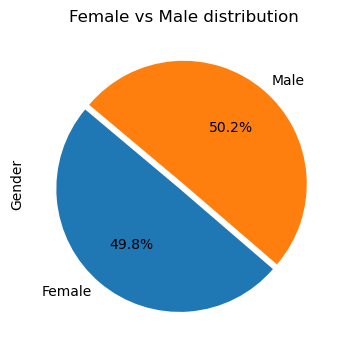

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_group = clean_df.groupby("Sex")
dup_clean_group = sex_group["Mouse ID"].nunique()
print(dup_clean_group)
explode = (0.05, 0)
pie_pandas = dup_clean_group.plot(kind="pie", explode=explode, startangle=140, autopct="%1.1f%%", figsize = (4,4), ylabel = "Gender")
pie_pandas.set_title("Female vs Male distribution")
plt.show()


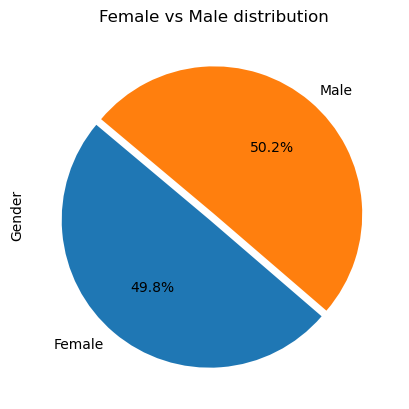

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0.05, 0)
pie_pyplot = plt.pie(dup_clean_group, explode=explode, startangle=140, autopct="%1.1f%%", labels=["Female", "Male"])
plt.title("Female vs Male distribution")
plt.ylabel("Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor = clean_df.drop_duplicates(subset=("Mouse ID"), keep="last")
tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    final_tumor_vol = tumor.loc[tumor["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    # add subset 
    tumor_vol.append(final_tumor_vol)
  # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = round(quartiles.loc[.25],1)
    upperq = round(quartiles.loc[.75],1)
    iqr = upperq - lowerq
    lower_bound = round(lowerq - (1.5*iqr),1)
    upper_bound = round(upperq + (1.5*iqr),1)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    outliers = len(outliers)
    print(f"The lower quartile for {drug} is: {lowerq}")
    print(f"The upper quartile for {drug} is: {upperq}")
    print(f"The interquartile range is: {round(iqr,2)}")
    print(f"The outliers are below {lower_bound} and above {upper_bound} for {drug}, in total {outliers} outlier(s) ")
    print("-------------")

The lower quartile for Capomulin is: 32.4
The upper quartile for Capomulin is: 40.2
The interquartile range is: 7.8
The outliers are below 20.7 and above 51.9 for Capomulin, in total 0 outlier(s) 
-------------
The lower quartile for Ramicane is: 31.6
The upper quartile for Ramicane is: 40.7
The interquartile range is: 9.1
The outliers are below 18.0 and above 54.4 for Ramicane, in total 0 outlier(s) 
-------------
The lower quartile for Infubinol is: 54.0
The upper quartile for Infubinol is: 65.5
The interquartile range is: 11.5
The outliers are below 36.8 and above 82.8 for Infubinol, in total 1 outlier(s) 
-------------
The lower quartile for Ceftamin is: 48.7
The upper quartile for Ceftamin is: 64.3
The interquartile range is: 15.6
The outliers are below 25.3 and above 87.7 for Ceftamin, in total 0 outlier(s) 
-------------


Text(0, 0.5, 'Final Tumor Volume (mm3)')

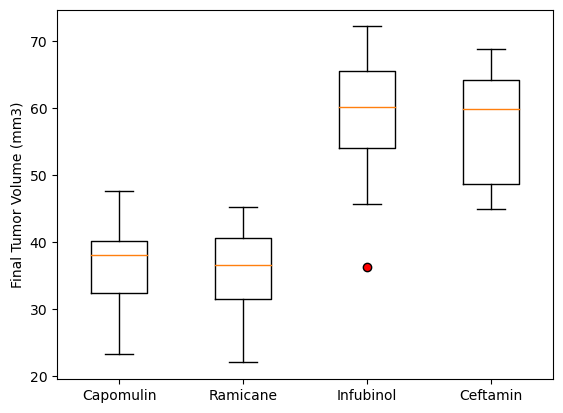

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor = "red")
plt.boxplot(tumor_vol, labels = treatments, flierprops = orange_out)
plt.ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

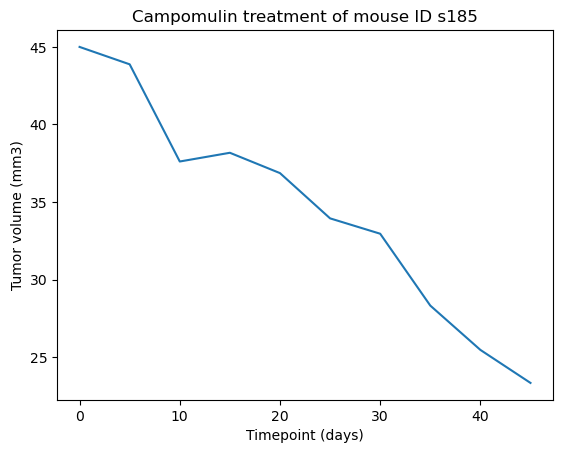

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#Capomuline_df = [clean_df["Drug Regimen"] == "Capomulin"]
tumor_Capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
mouse = tumor_Capomulin[tumor_Capomulin["Mouse ID"] == "s185"]
mouse
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor volume (mm3)")
plt.title("Campomulin treatment of mouse ID s185")
plt.show()

C:\Users\slava\AppData\Local\Temp\ipykernel_11756\547366382.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Capomulin_average = tumor_Capomulin.groupby(["Mouse ID"]).mean()


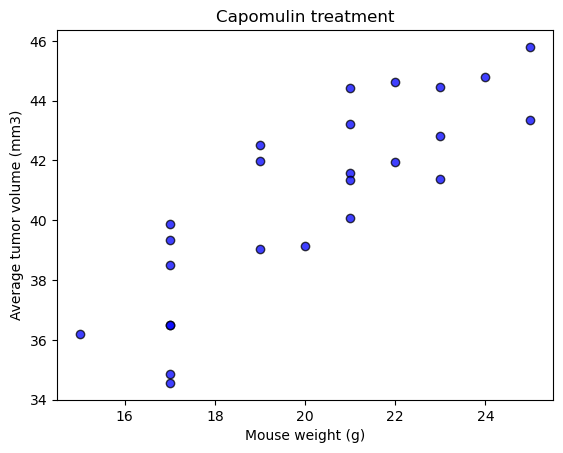

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen 
from scipy.stats import linregress
Capomulin_average = tumor_Capomulin.groupby(["Mouse ID"]).mean()
plt.scatter(Capomulin_average["Weight (g)"], Capomulin_average["Tumor Volume (mm3)"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel("Mouse weight (g)")
plt.ylabel("Average tumor volume (mm3)")
plt.title("Capomulin treatment")
plt.show()

## Correlation and Regression

The correlation coefficient (r-squared) is: 0.84


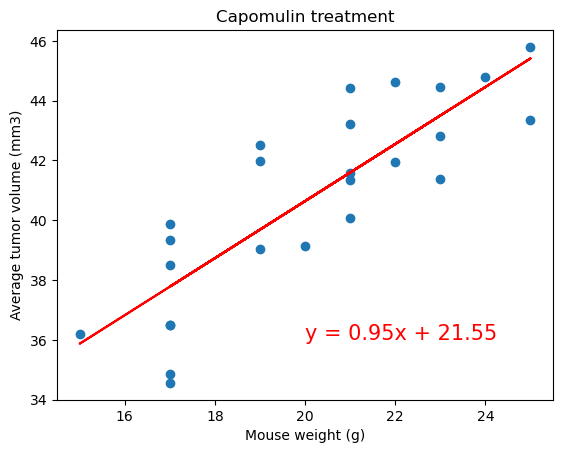

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(Capomulin_average["Weight (g)"], Capomulin_average["Tumor Volume (mm3)"])
regress_values = Capomulin_average["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Capomulin_average["Weight (g)"], Capomulin_average["Tumor Volume (mm3)"])
plt.plot(Capomulin_average["Weight (g)"],regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Average tumor volume (mm3)")
plt.title("Capomulin treatment")
print(f"The correlation coefficient (r-squared) is: {round(rvalue, 2)}")
plt.show()